## IMPORT

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.io import wavfile
from scipy.fftpack import fft,ifft,dct,idct

## Read Audio file

In [32]:
def InputFromAudioFile():
    fs, data = wavfile.read('audio_file.wav')
    data = data[:fs]
    return data

In [33]:
def DFT_DCT_Transform(transform_type,x):
    N=len(x)
    if transform_type==0:
        gtm=fft(x)
    if transform_type==1:
        gtm=dct(x,norm='ortho')
    return gtm   

def IDFT_IDCT_Transform(transform_type,X):
    N=len(X)
    if transform_type==0:
        igtm=ifft(X)
    if transform_type==1:
        igtm=idct(X,norm='ortho')
    return igtm

def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N

def RMDFT(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

def  RmDCT(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    


def MSE(transform_type,x,X,N):
    error=[]
    fraction=100
    for l in range(0,N,fraction):
        if transform_type==0:
            Xm=RMDFT(X,l,N)
            xm=IDFT_IDCT_Transform(0,Xm)
        if transform_type==1:
            Xm=RmDCT(X,l,N)
            xm=IDFT_IDCT_Transform(1,Xm)
        y=xm-x
        error=np.append(error,np.dot(y,np.conjugate(y))/N)
    return error



# Main Function

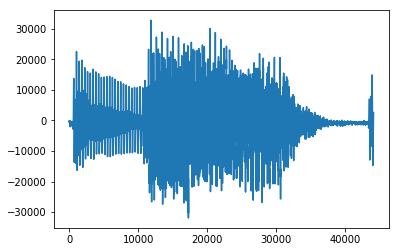

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


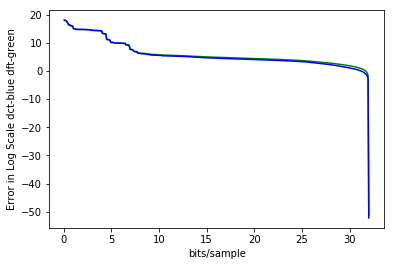

In [34]:
input_data = InputFromAudioFile()
plt.plot(input_data,label="input audio")
plt.show()

N = input_data.shape[0]
bits = 32
color=['g', 'b']
for i in range(0,2,1):
    transformOfInputData = DFT_DCT_Transform(i,input_data)
    err  = MSE(i,input_data,transformOfInputData,N)
    err  = np.log(err) # Log error
    x  = np.arange(0,N,100)
    x  = 32*(N-x)/N
    plt.plot(x,err,color[i])
    plt.xlabel("bits/sample")
    plt.ylabel("Error in Log Scale dct-blue dft-green")
plt.show()



